<center> <img src="https://i0.wp.com/ceppe.org.mx/wp-content/uploads/2015/11/Logo_Horizontal_ITESO.jpg?fit=1713%2C789&ssl=1" align="center" width="960" height="480"/> </center>

<center><font color=#555555><font size=6> MAF1731 - Microstructure and Trading Systems </font> <br> <br>
    
<center><font color=#555555><font size=5> Financial Engineering </font> <br> <br> <br> <br>
    
<center><font color=#555555><font size=5> Christian Eduardo González Reyes </font> <br> <br> <br> <br>
    
<center><font color=#555555><font size=5> 10/02/2023 </font> <br> <br> <br> <br>

   
<center> <font color= #555555> <font size = 4> Ene 2023 </a> | <font color= #555555> <font size = 4> Repository: <a href='https://github.com/CGONZALEZ991022/Laboratorio-1'>Link</a></font>

<hr style="border:0.02in solid gray"> </hr>

<center> <font color= #555555> <font size = 6> Module 1 </font> <br> <br> <font color= #555555> <font size = 5>Inversión del capital  </font>

<hr style="border:0.02in solid gray"> </hr>

<center> <font color= #555555> <font size = 6> Librerías y dependencias </font> <br> <br> <font color= #555555> 

In [77]:
#Librerias que se utilizaron para este laboratorio
import pandas as pd
import numpy as np
import plotly.express as px
import Data, functions
from scipy.optimize import minimize
import matplotlib.pyplot as plt

<hr style="border:0.02in solid gray"> </hr>

<center> <font color= #555555> <font size = 6> Introducción </font> <br> <br> <font color= #555555> 

En este Laboratorio 1, se tiene un caso sobre: **¿Qué estrategia de inversión propondrías si tu trabajo fuera invertir 1 Millón de pesos?** Para esto se tendra que simular un caso donde tienes **1 Millón de pesos**, tienes dos opciones para invertirlos. Por un lado, puedes hacer una **Inversión Pasiva del capital**, comprando el **100% del capital** de títulos de un ETF que replica al mercado de renta variable mexicano **S&P/BMV IPC** que es el **NAFTRAC**. Pero por otro lado, puedes hacer una **Inversión Activa del capital**, al crear un portafolio que tenga los mismos activos que el **ETF** y haciendo el rebalanceo por medio de un algoritmo en específico.

Debemos de considerar que **La inversión activa** implica toma de decisiones individuales sobre qué valores comprar, mientras que la **inversión pasiva** es seguir el mercado y comprar un índice representativo. **La inversión activa** puede ser más costosa y ofrecer más control y flexibilidad, mientras que **la inversión pasiva** es más fácil y menos costosa y se basa en la eficiencia del mercado. Ambas opciones tienen riesgos similares y no hay garantía de que la activa sea más rentable que la pasiva.

<hr style="border:0.02in solid gray"> </hr>

<center> <font color= #555555> <font size = 6> Objetivos </font> <br> <br> <font color= #555555> 

Los objetivos que se identifican en este Laboratorio son los siguientes:


<ol>
  <li>Diferenciar entre la inversión activa y la inversión pasiva.</li>
  <li>Explicar las características de cada tipo de inversión, como el costo, el control, la flexibilidad, la facilidad, la base en la eficiencia del mercado, etc.</li>
  <li>Señalar los riesgos similares asociados con ambos tipos de inversión.
</li>
  <li>Señalar la ausencia de garantías de que la inversión activa sea más rentable que la inversión pasiva.
</li>
</ol> 

<hr style="border:0.02in solid gray"> </hr>

<center> <font color= #555555> <font size = 6> Estrategía de Inversión Pasiva </font> <br> <br> <font color= #555555> <font size = 5> Consideraciones Básicas </font>

Algunas consideraciones en este Laboratorio son los siguientes:
<ol>
  <li>Capital Inicial de 1 Millón de pesos.</li>
  <li>Periodo 2+ años: 31-01-2021 a 25-01-2023.</li>
  <li>Se consideran las comisiones a pagar por cada rebalanceo de 0.125% del valor de la operación.</li>
  <li>Solo se permiten operaciones de compra (posición en largo).</li>
  <li>Las operaciones se ejecutan al precio de mercado y se considera un solo precio de compra o de venta para todos los títulos en la operación.</li>
  <li>Calcula el valor de ese portafolio para todas las fechas utilizando los archivos históricos.</li>
  <li>Como es Inversión Pasiva, forma un portafolio con las ponderaciones del primer mes y calcula sus comisiones, para los siguientes periodos no harás rebalanceo (por lo tanto no habrá comisiones que calcular excepto el 1er mes) pero si debes de utilizar los precios de cada mes para recalcular el valor del portafolio cada mes.</li>
  <li>En todos los meses (archivos) el % de capital indicado para KOFL.MX, KOFUBL.MX, USD.MXN, BSMXB.MX, NMKA.MX  lo vamos a eliminar de las posiciones históricas y considerar como CASH.</li>
</ol> 

In [2]:
#Tickers que se utilizaran para este 
Tickers_Mx = ["AMXL.MX", "WALMEX.MX", "GMEXICOB.MX", "FEMSAUBD.MX", "GFNORTEO.MX", "CEMEXCPO.MX"
            , "GAPB.MX", "ELEKTRA.MX", "TLEVISACPO.MX", "ASURB.MX", "BIMBOA.MX", "KIMBERA.MX"
            , "KOFUBL.MX", "GRUMAB.MX", "ORBIA.MX", "OMAB.MX", "AC.MX", "GFINBURO.MX"
            , "PE&OLES.MX", "ALFAA.MX", "PINFRA.MX", "CUERVO.MX", "GCARSOA1.MX", "MEGACPO.MX"
            , "BOLSAA.MX", "VESTA.MX", "GCC.MX", "Q.MX", "BBAJIOO.MX", "LIVEPOLC-1.MX", "ALSEA.MX"]

In [9]:
Mexico = functions.Descargar_Acciones_IPC(Tickers_Mx, "2021-01-31", "2023-01-25", False)["Adj Close"]

In [39]:
Capital, Comision = 1000000, 0.00125
Dinero_Disponible = Capital * (1 - Comision)
weights = np.array([1.55,1.36,0.44,12.29,2.43,0.67,2.04,0.82,6.71,0.9,3.05,9.79,3.08,0.88,1.49,9.39,10.57,1.79,1.91,1.76,0.49,0.84,1.57,1.68,1.43,1.21,0.7,0.72,2.96,0.82,11.14]) / 100

In [35]:
Acciones_Compra = ((Dinero_Disponible / Mexico * weights).round()).T.iloc[:,0]
costo_total = (Acciones_Compra * Mexico.T.iloc[:,0]).round()
comision = Comision * costo_total
datos = {
    "Titulos Comprados": Acciones_Compra,
    "Costo Total": costo_total,
    "Comisión": comision
}
pd.DataFrame(datos)

,Titulos Comprados,Costo Total,Comisión
AC.MX,180.0,15516.0,19.39500
ALFAA.MX,1134.0,13585.0,16.98125
ALSEA.MX,185.0,4386.0,5.48250
AMXL.MX,9395.0,122744.0,153.43000
ASURB.MX,77.0,24223.0,30.27875
BBAJIOO.MX,340.0,6693.0,8.36625
BIMBOA.MX,531.0,20363.0,25.45375
BOLSAA.MX,193.0,8194.0,10.24250
CEMEXCPO.MX,5353.0,67020.0,83.77500
CUERVO.MX,204.0,8975.0,11.21875


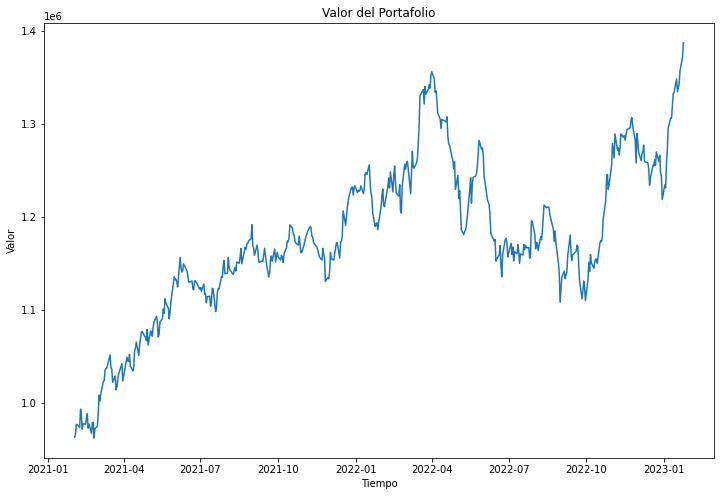

In [79]:
valor_portafolio = (Acciones_Compra * Mexico).sum(axis=1)
fig = plt.figure(figsize=(12, 8))
plt.plot(valor_portafolio)
plt.title("Valor del Portafolio")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.show()

<center> <font color= #555555> <font size = 6> Estrategía de Inversión Activa </font> <br> <br> <font color= #555555> <font size = 5> Consideraciones Básicas </font>

Algunas consideraciones en este Laboratorio son los siguientes:
<ol>
  <li>Capital Inicial de 1 Millón de pesos.</li>
  <li>Periodo 2+ años: 31-01-2021 a 25-01-2023.</li>
  <li>Con el capital que NO ES CASH, construye un portafolio eficiente, maximizando el sharpe estándar, empezando desde el  31-01-2021 y utilizando los rendimientos logartimicos diarios hasta el 31-01-2022.</li>
  <li>A partir del siguiente mes inmediato al 29-02-2022, rebalancea, con los precios diarios, utilizando la siguiente regla:</li>
  <li>Disminuir en un 2.5% la posición en títulos de aquellos activos cuyo precio disminuyó un 5% o más.</li>
  <li>Aumentar en un 2.5% la posición en títulos de aquellos activos cuyo precio aumentó un 5% o más.</li>
  <li>Considera pagar las mismas comisiones por rebalanceo para cada cambio de posición con cada activo según aplique.</li>
</ol> 

In [51]:
Markowtiz_Data = functions.Descargar_Acciones_IPC(Tickers_Mx, "2020-01-31", "2021-01-31", False)["Adj Close"]

In [53]:
# Retornos porcentuales diarios
returns = Markowtiz_Data.pct_change().dropna()
returns.head()

,AC.MX,ALFAA.MX,ALSEA.MX,AMXL.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CUERVO.MX,...,LIVEPOLC-1.MX,MEGACPO.MX,OMAB.MX,ORBIA.MX,PE&OLES.MX,PINFRA.MX,Q.MX,TLEVISACPO.MX,VESTA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-04,0.016430,-0.000705,0.000546,0.018796,0.007297,0.003525,0.014199,-0.002072,0.046083,0.029226,...,-0.015344,0.005164,0.005113,0.052804,0.013125,0.001372,0.056443,0.008459,0.023313,0.025444
2020-02-05,-0.012950,-0.009873,0.008506,-0.006254,0.018863,-0.003672,-0.008896,-0.011765,-0.024544,-0.002505,...,-0.016958,0.025829,-0.003045,0.002459,-0.018707,-0.007999,-0.035619,-0.032372,-0.013726,-0.008918
2020-02-06,0.001396,-0.027066,-0.003028,-0.013216,-0.008130,-0.002244,-0.025015,0.010037,0.000000,-0.033212,...,-0.027973,-0.029500,0.006734,-0.008534,-0.015954,0.006510,0.018872,-0.014164,-0.014634,-0.016215
2020-02-07,-0.000093,-0.021962,-0.019523,-0.002551,-0.007845,-0.012528,0.001207,-0.006009,0.005161,-0.023672,...,0.001919,0.017249,-0.006620,-0.007747,0.000725,-0.006909,0.010000,-0.008422,-0.005533,0.014309
2020-02-10,-0.003764,0.008234,0.004425,-0.015985,0.004308,-0.004229,-0.005879,0.014648,-0.007060,0.016115,...,-0.000798,0.010980,0.001041,-0.008024,0.002226,-0.003627,-0.013726,-0.003123,-0.002782,0.004196


In [58]:
# Caracterización de la distribución de rendimientos (medias y varianzas)
exp_ret = returns.mean()
s = returns.std()
cov = returns.cov()
annual_summary = pd.DataFrame({"Rendimiento esperado (base anual)" : exp_ret*252,
                               "Volatilidad (base anual)" : s*np.sqrt(252)})
(annual_summary.round(4)*100).head(10)

,Rendimiento esperado (base anual),Volatilidad (base anual)
AC.MX,-5.35,26.98
ALFAA.MX,12.28,66.06
ALSEA.MX,-46.19,65.13
AMXL.MX,-4.14,33.21
ASURB.MX,-0.97,47.09
BBAJIOO.MX,-12.29,46.93
BIMBOA.MX,24.41,44.49
BOLSAA.MX,20.96,47.37
CEMEXCPO.MX,59.53,55.92
CUERVO.MX,30.67,36.33


In [60]:
# Tasa libre de riesgo (base diaria)
rf = 0.11
# Número de activos
N = len(Markowtiz_Data.iloc[0])
# Pesos iniciales
w0 = np.ones(N) / N
# Bounds y constraints
bnds = ((0, None),) * N 
cons = {"type" : "eq", "fun" : lambda w : w.sum() - 1}

In [69]:
emv = minimize(fun = minus_RS, x0 = w0, args = (rf, exp_ret, cov), bounds = bnds, constraints = cons, tol = 1e-15)

In [73]:
emv

     fun: 3.0821091356092736
     jac: array([-0.41124159, -1.41374391, -1.6452592 , -0.73621464, -1.88240093,
       -1.21513903, -0.66685665, -0.66223139, -1.35799113, -0.36216819,
        0.06931165, -0.83489791, -3.0862219 , -0.93246073, -0.56056195,
       -1.15563938, -1.59035888, -0.97562468, -0.30635148, -0.33159479,
       -0.49354246, -1.06435737, -0.37500939, -2.35248077, -1.21897471,
       -0.75591394, -0.8543987 , -0.84060737, -1.51631081, -0.92365354,
       -0.58123147])
 message: 'Positive directional derivative for linesearch'
    nfev: 1151
     nit: 33
    njev: 29
  status: 8
 success: False
       x: array([1.82953877e-14, 8.67012883e-15, 3.33647993e-15, 6.71535992e-15,
       1.28593976e-14, 1.88623167e-14, 8.59006759e-21, 8.30856999e-15,
       8.42034173e-15, 1.29787220e-19, 1.55756379e-18, 3.19088557e-16,
       1.00000000e+00, 3.52327556e-18, 9.18692605e-21, 3.51829918e-15,
       1.24449726e-15, 5.99985484e-15, 9.28368510e-21, 7.69125949e-21,
       9.055610

In [74]:
w_pemv = pd.DataFrame(np.round(emv.x.reshape(1, N), 2), columns = Markowtiz_Data.columns, index = ["Ponderación"])
c = w_pemv.T
c.sort_values(by= 'Ponderación', ascending=False)

,Ponderación
GAPB.MX,1.0
AC.MX,0.0
GFNORTEO.MX,0.0
VESTA.MX,0.0
TLEVISACPO.MX,0.0
Q.MX,0.0
PINFRA.MX,0.0
PE&OLES.MX,0.0
ORBIA.MX,0.0
OMAB.MX,0.0


<br>